In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import splat
import astropy.units as u
import popsims
splat.initializeStandards(all=True)
from scipy import interpolate
from tqdm import tqdm
%matplotlib inline



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
#read in Zhang samples
files=glob.glob('/volumes/LaCie/zhang/*/*.fits')

In [3]:
len(files)

125

In [4]:
def get_spectrum(f):
    try:
        hdu=fits.open(f)[0]
        wave=np.array([hdu.header['CRVAL1']+hdu.header['CDELT1']*x for x \
          in range(0, hdu.header['NAXIS1'])])*u.angstrom.to(u.micron)
        flux= hdu.data*u.erg/(u.cm**2 * u.s * u.micron)
        s=splat.Spectrum(wave=wave, flux=flux, noise=flux/1000, name=f.split('/')[-1])
        #s.smooth(150)
        #s.toInstrument('SpeX')
        #plt.plot(s.wave, s.flux)
        return s
    except:
        print ('could not read file {}'.format(f))
        return None

In [20]:
def interpolated_standards():
    stds=splat.STDS_DWARF_SPEX
    interpstds={}
    for k in stds.keys():
        s=stds[k]
        print (k)
        s.normalize()
        s.toInstrument('WFC3-G141')
        interpstds[k]=(interpolate.interp1d(s.wave.value, s.flux.value), interpolate.interp1d(s.wave.value, s.noise.value))
    return interpstds

In [21]:
spectra=[ get_spectrum(f) for f in tqdm(files)]

 44%|██████████████████▍                       | 55/125 [00:05<00:07,  9.61it/s]

could not read file /volumes/LaCie/zhang/sty2054_supplemental_files/ULAS_J130710.22+151103.4_sdL8_Xshooter_NIR_Primeval-IV.fits


 49%|████████████████████▍                     | 61/125 [00:05<00:05, 11.97it/s]

could not read file /volumes/LaCie/zhang/sty2054_supplemental_files/ULAS_J135058.85+081506.8_usdL3_Xshooter_NIR_Primeval-III.fits


 57%|███████████████████████▊                  | 71/125 [00:06<00:03, 13.55it/s]

could not read file /volumes/LaCie/zhang/sty2054_supplemental_files/ULAS_J135058.85+081506.8_usdL3_Xshooter_VIS_Primeval-III.fits
could not read file /volumes/LaCie/zhang/sty2054_supplemental_files/ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits


 86%|███████████████████████████████████      | 107/125 [00:11<00:04,  3.69it/s]

could not read file /volumes/LaCie/zhang/spectra/vhs1321viscorrclean.fits


 88%|████████████████████████████████████     | 110/125 [00:12<00:03,  4.35it/s]

could not read file /volumes/LaCie/zhang/spectra/vik0128viscorrclean.fits
could not read file /volumes/LaCie/zhang/spectra/vhs1321nircorrclean.fits


 90%|█████████████████████████████████████    | 113/125 [00:12<00:01,  6.22it/s]

could not read file /volumes/LaCie/zhang/spectra/ULAS_J002136.00+155227.3_T4p_OSIRIS_Primeval-VI.fits
could not read file /volumes/LaCie/zhang/spectra/vik0128nircorrclean.fits
could not read file /volumes/LaCie/zhang/spectra/ULAS_J000844.34+012729.4_T6.5_OSIRIS_Primeval-VI.fits


 95%|███████████████████████████████████████  | 119/125 [00:13<00:00,  6.02it/s]

could not read file /volumes/LaCie/zhang/spectra/vik0916viscorrclean.fits
could not read file /volumes/LaCie/zhang/spectra/ULAS_J012947.35+151143.1_T4_OSIRIS_Primeval-VI..fits


 98%|████████████████████████████████████████ | 122/125 [00:13<00:00,  7.31it/s]

could not read file /volumes/LaCie/zhang/spectra/vik0916nircorrclean.fits


100%|█████████████████████████████████████████| 125/125 [00:14<00:00,  8.71it/s]


In [7]:
#visually confirmed templates (ignore for now)
#visual_sds=pd.read_pickle('/volumes/LaCie/wispsdata/db/subdwarfs_templates.pkl')

In [14]:
#sp_designations=[]

In [22]:
spectra=[s for s in spectra if s is not None]
sp_designations=[s.name.split('_')[1] for s in spectra]
sp_types=[s.name.split('_')[2] for s in spectra]

In [24]:
#sp_designations

In [25]:
def return_sptype(optp, nirtp):
    if optp.lower() =='nan':
        return nirtp
    else:
        return optp
#visual_types=[ return_sptype(x, y) for x, y in zip(visual_sds.opt_type.astype(str).values,\
#                                                   visual_sds.spex_type.astype(str).values)]

In [26]:
#

In [27]:
combined_df=pd.DataFrame()
#combined_df['spectra']=np.concatenate([spectra, visual_sds.splat_spectra.values])
combined_df['spectra']=spectra
combined_df['sptype']=sp_types#np.concatenate([sp_types, visual_types]

In [28]:
combined_df.to_pickle(popsims.DATA_FOLDER+'/combined_sd_templates.pkl')

In [29]:
spectra

[ spectrum of ULAS_J021642.96+004005.7_sdL4_Xshooter_VIS_Primeval-I.fits,
  spectrum of ULAS_J223302.03+062030.8_esdL0.5_Xshooter_VIS_Primeval-IV.fits,
  spectrum of ULAS_J231949.36+044559.5_M7_comb_OSIRIS_scombine_Primeval-IV.fits,
  spectrum of ULAS_J141203.85+121609.9_sdL5_Xshooter_NIR_Primeval-IV.fits,
  spectrum of ULAS_J010756.85+100811.3_sdM7_OSIRIS_GTC63-13A_Primeval-IV.fits,
  spectrum of SDSS_J010448.46+153501.8_usdL1.5_Xshooter_NIR_Primeval-II.fits,
  spectrum of ULAS_J021642.96+004005.7_sdL4_Xshooter_NIR_Primeval-I.fits,
  spectrum of ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC39-12B_Primeval-IV.fits,
  spectrum of ULAS_J141203.85+121609.9_sdL5_OSIRIS_GTC39-12B_Primeval-IV.fits,
  spectrum of ULAS_J082206.61+044101.8_sdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits,
  spectrum of ULAS_J130710.22+151103.4_sdL8_OSIRIS_GTC46-14A_Primeval-IV.fits,
  spectrum of ULAS_J154638.34-011213.0_sdL3_OSIRIS_GTC63-13A_Primeval-IV.fits,
  spectrum of ULAS_J020628.22+020255.6_sdM7_OSIRIS_GTC39-12B_Pr

In [36]:
import glob
import splat
kast_path='/users/caganze/research/kastredux/resources/spectral_standards/*'

In [ ]:
#s.plot()

In [31]:
def read_kast_spectra(file):
    try:
        s=splat.Spectrum(filename=file, wunit=u.Angstrom)
        s.toWaveUnit(u.micron)
        return s
    except:
        return None
    
def get_spectraltype(s):
    if s is None: return None
    else: return s.name.split(' ')[-1].split('_')[0]

In [37]:
files=glob.glob(kast_path)
spectra=[read_kast_spectra(x) for x in files]

In [38]:
#kast_apth

In [39]:
kast_df=pd.DataFrame()
kast_df['spectra']=spectra
kast_df['sptype']=[get_spectraltype(s) for s in spectra]

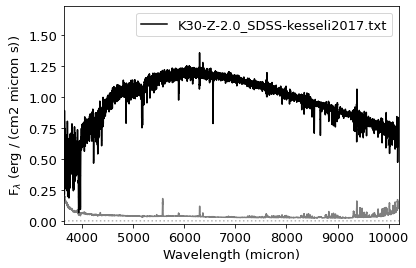

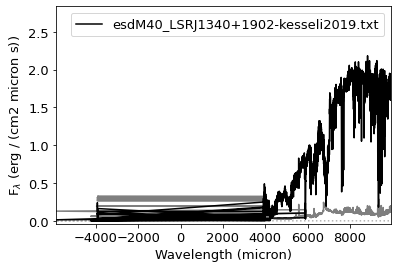

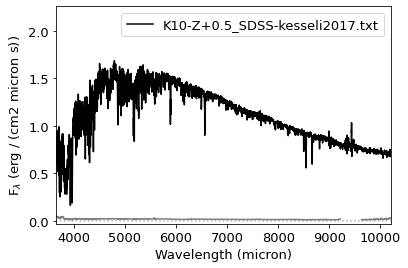

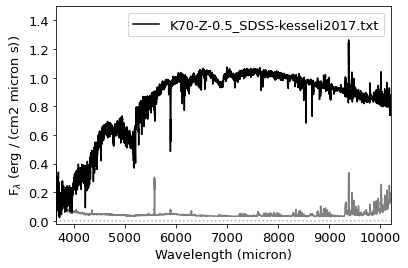

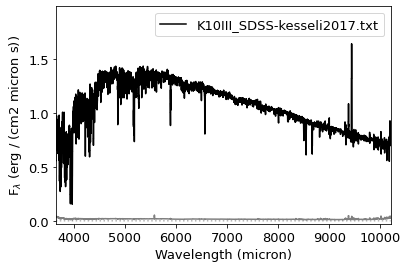

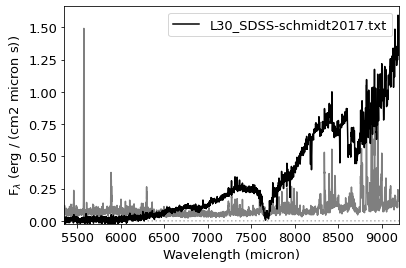

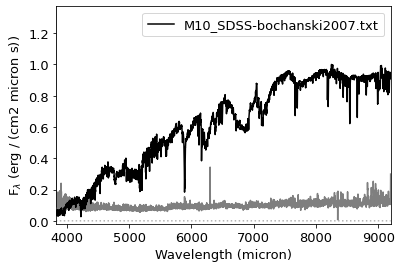

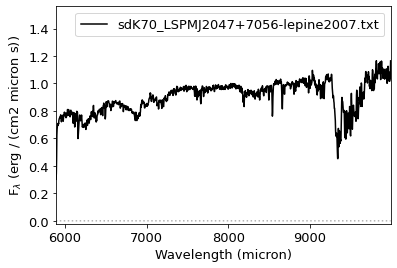

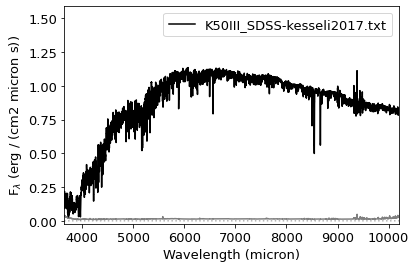

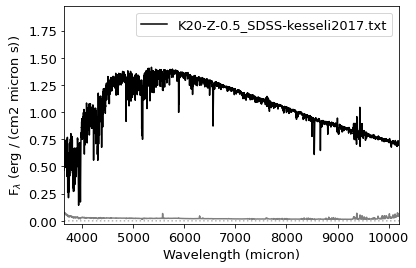

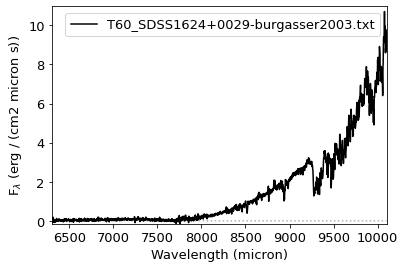

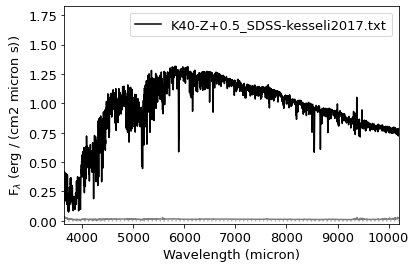

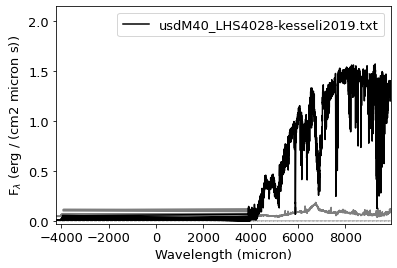

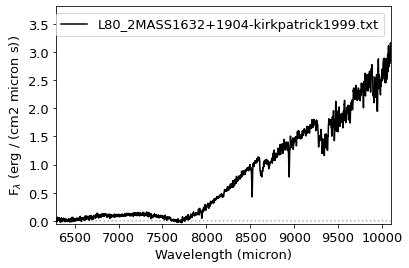

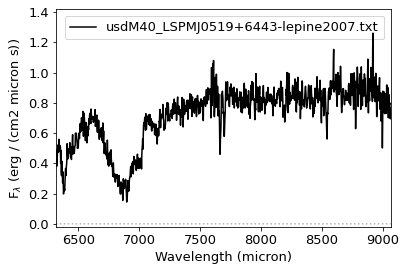

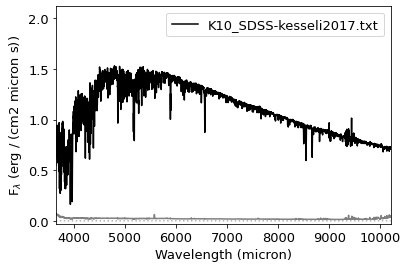

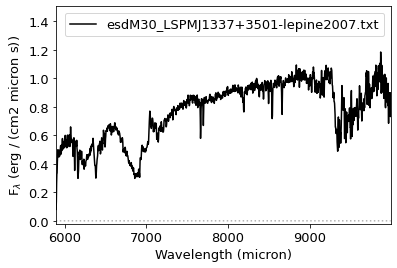

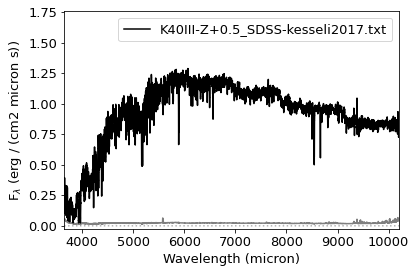

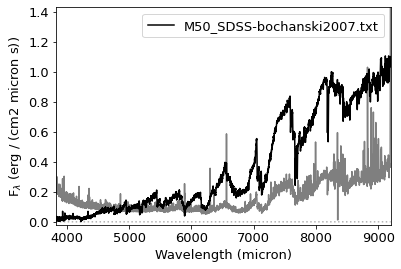

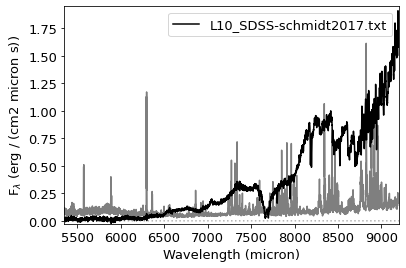

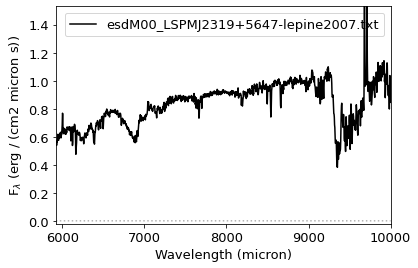

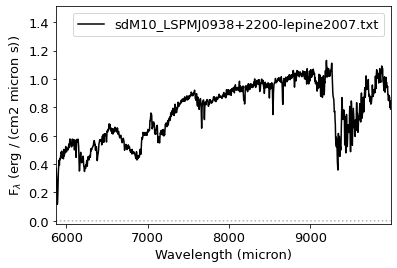

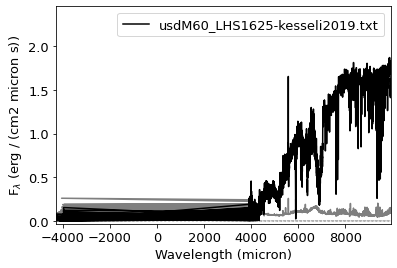

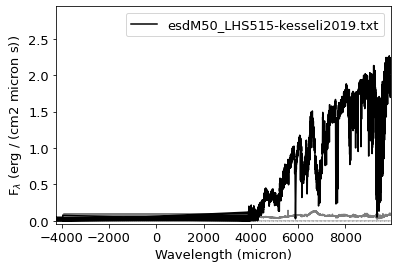

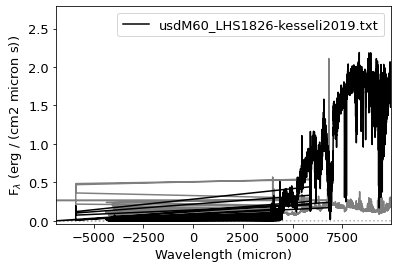

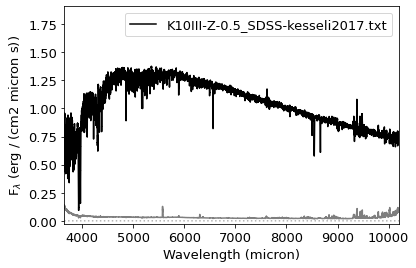

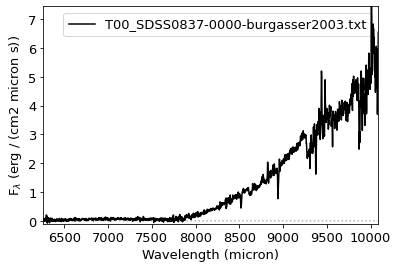

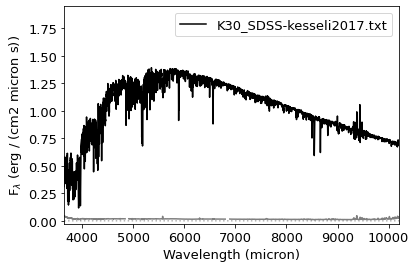

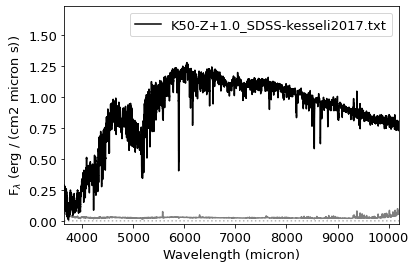

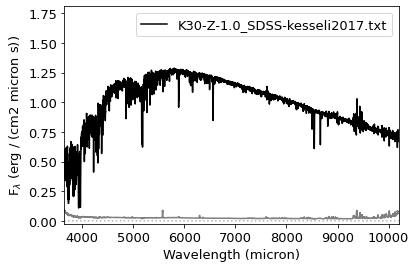

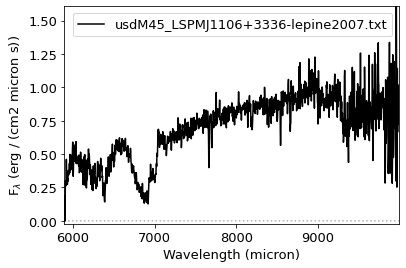

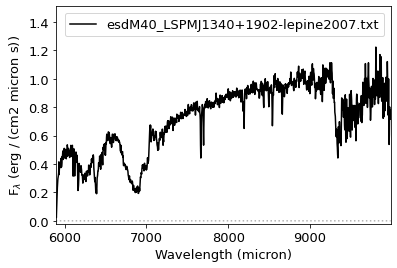

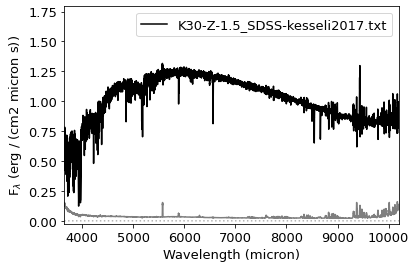

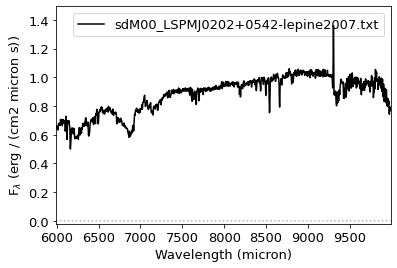

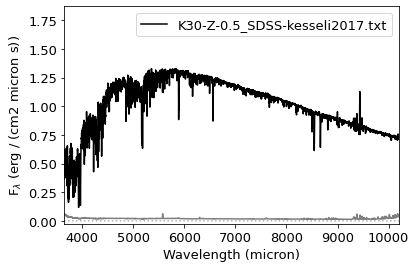

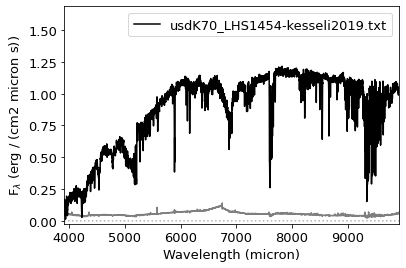

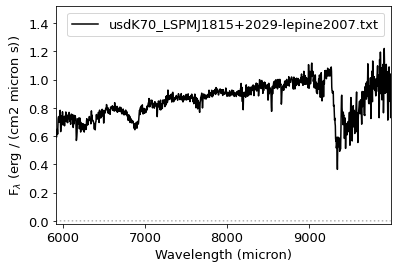

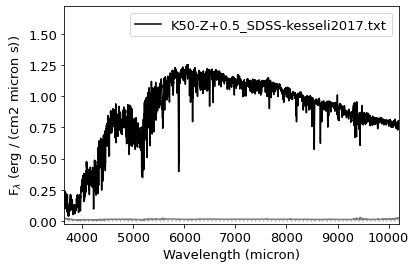

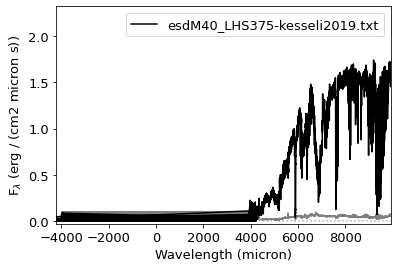

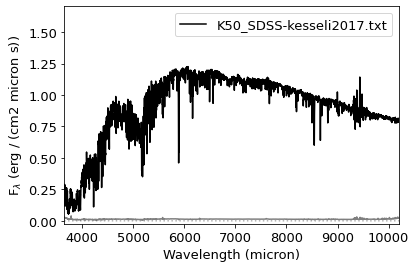

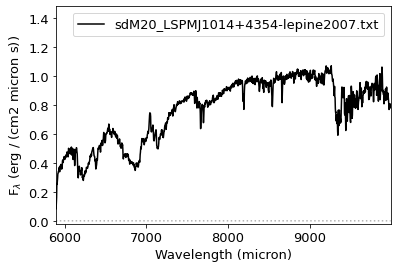

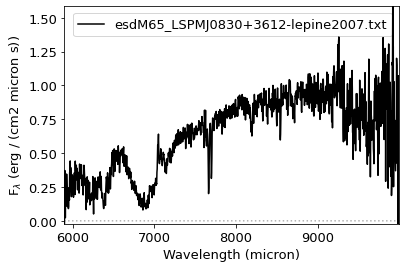

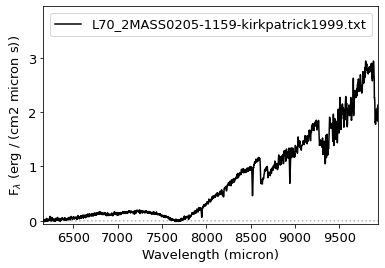

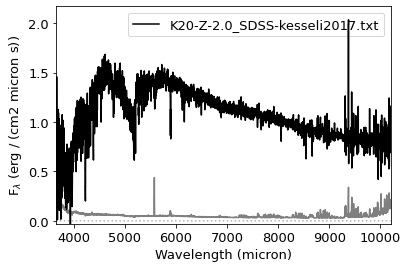

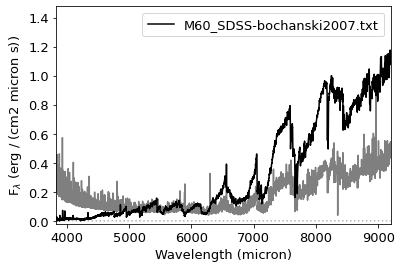

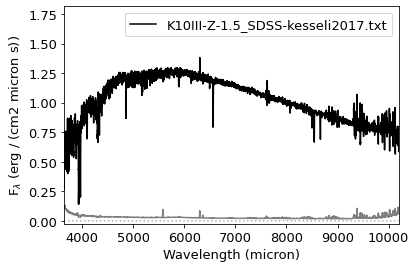

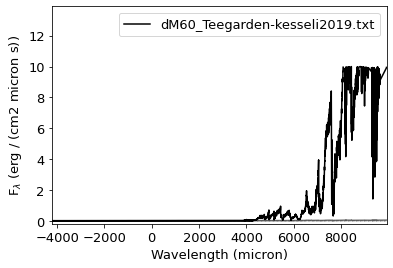

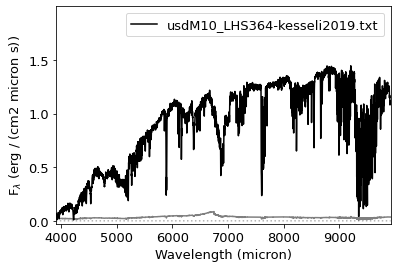

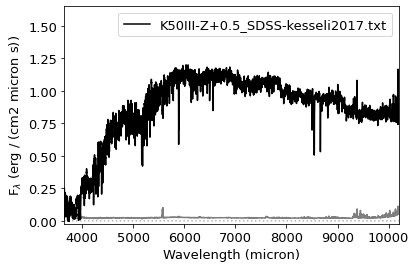

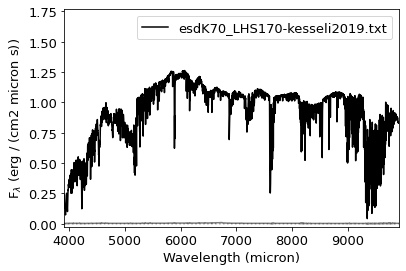

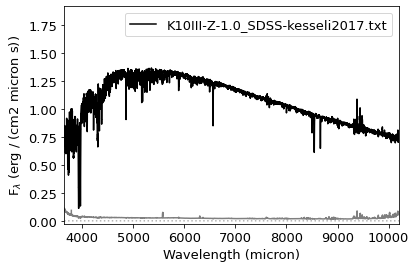

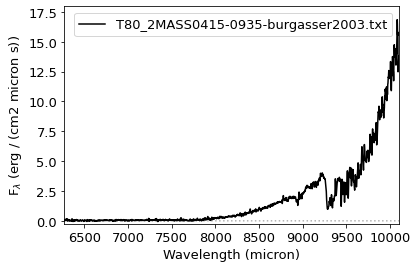

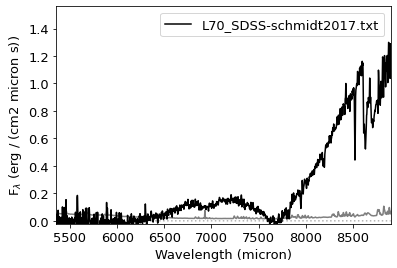

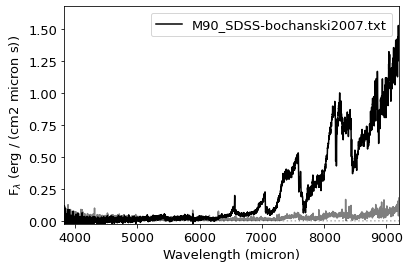

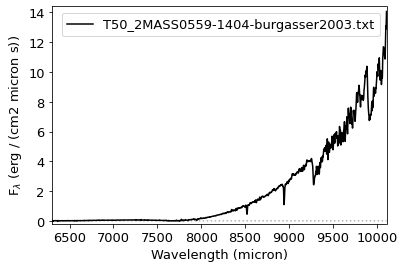

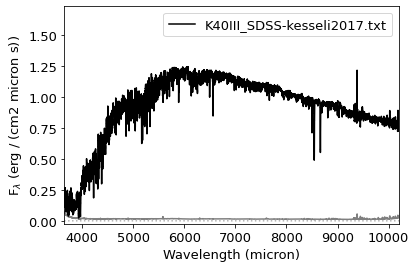

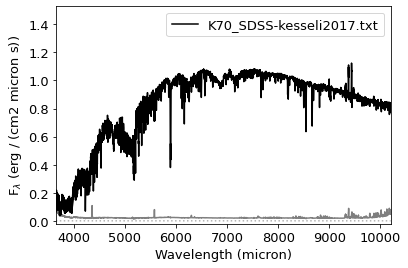

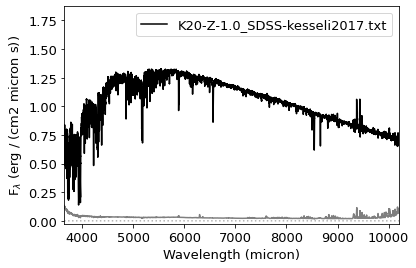

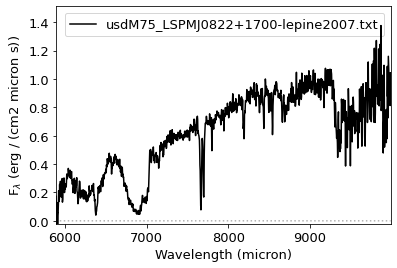

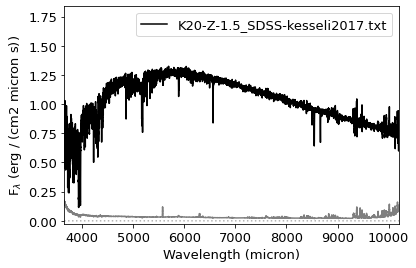

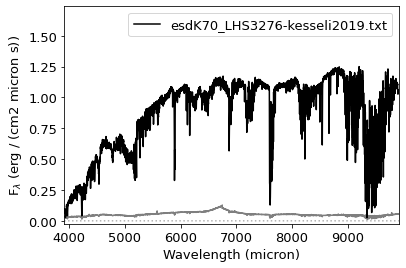

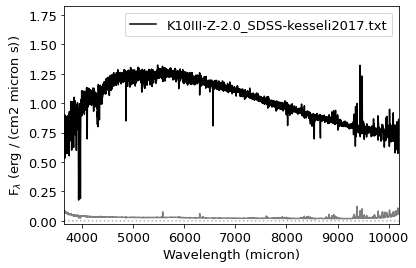

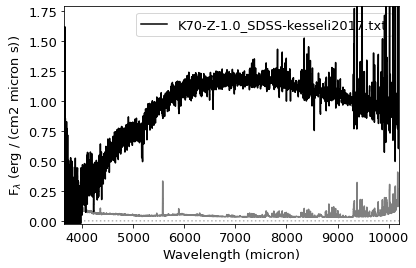

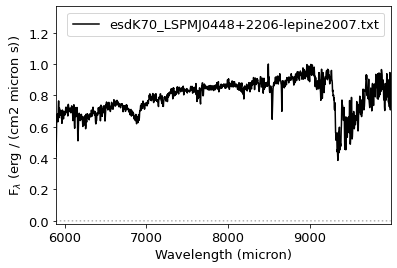

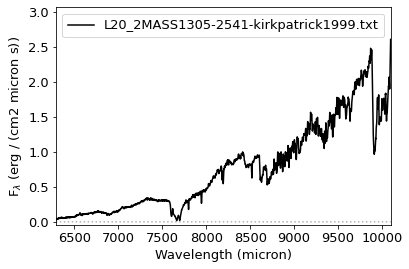

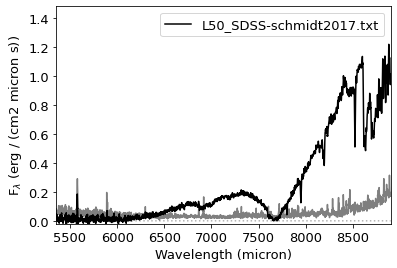

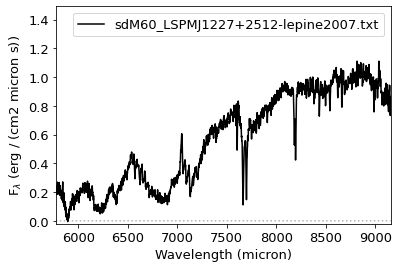

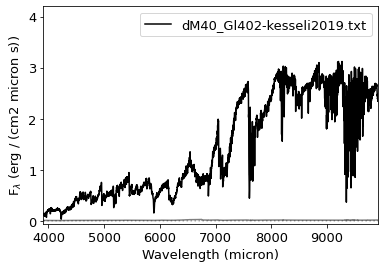

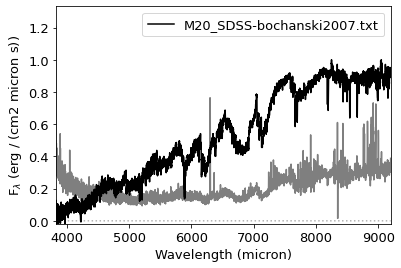

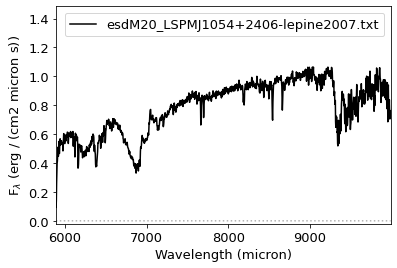

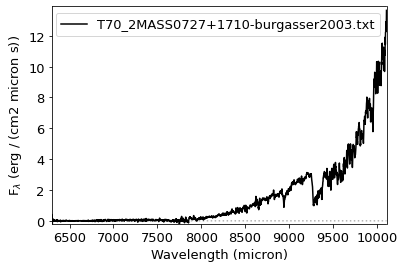

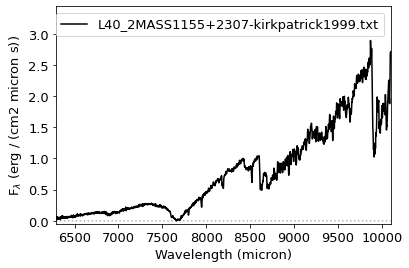

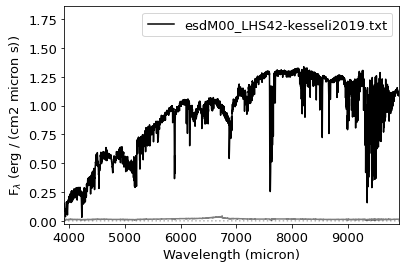

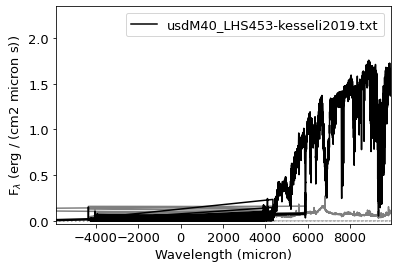

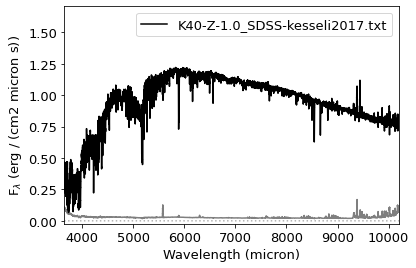

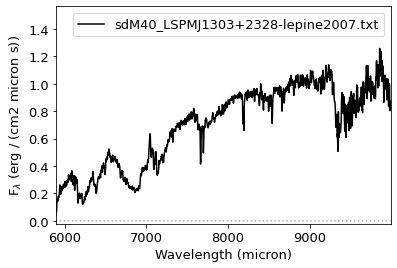

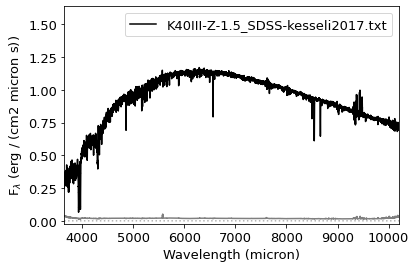

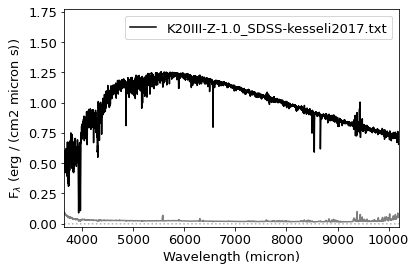

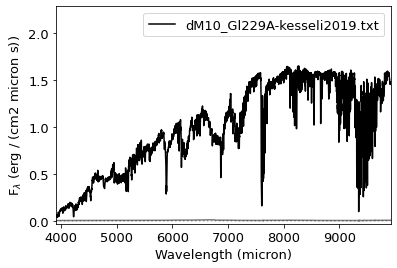

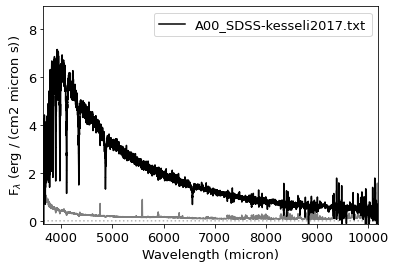

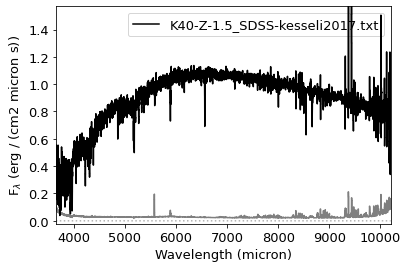

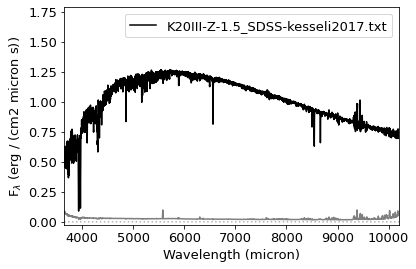

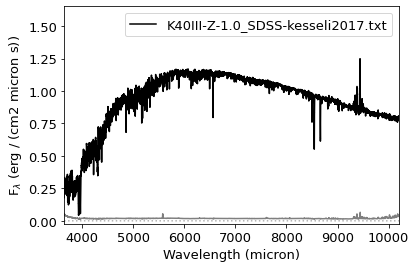

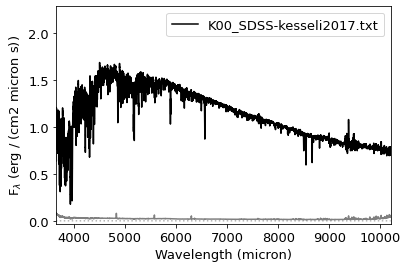

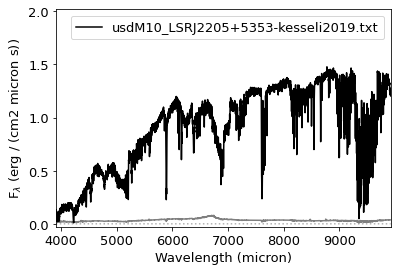

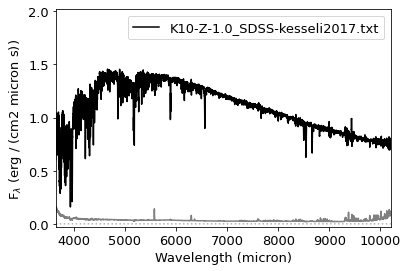

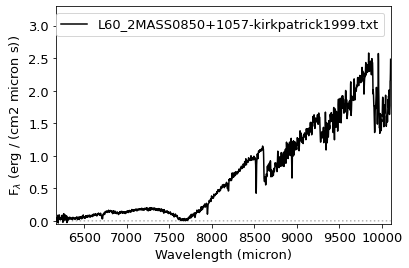

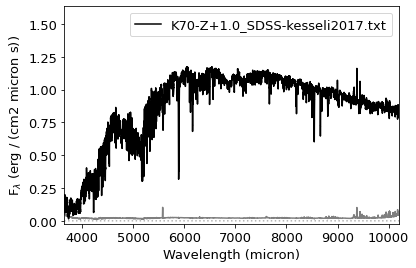

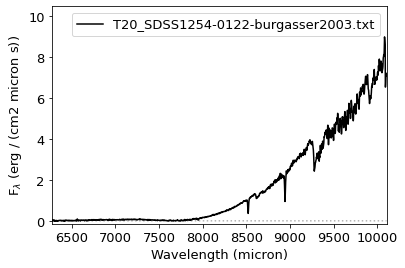

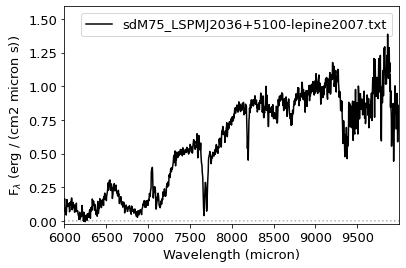

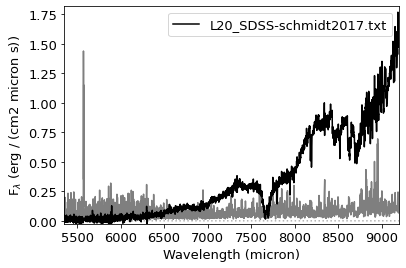

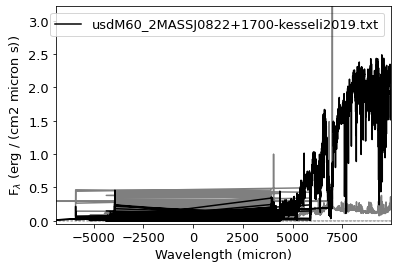

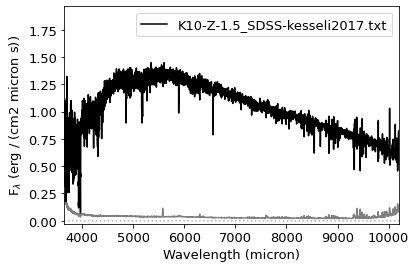

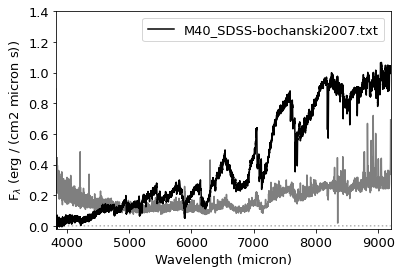

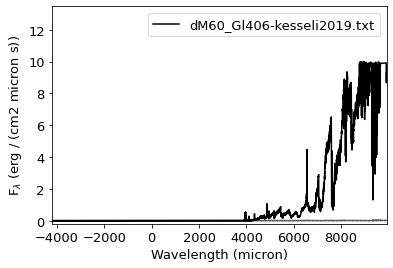

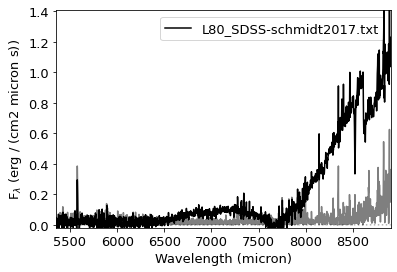

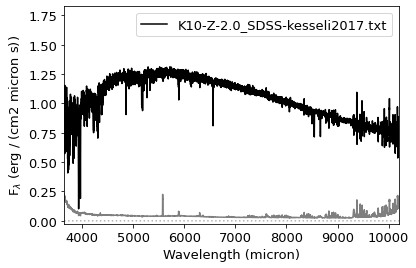

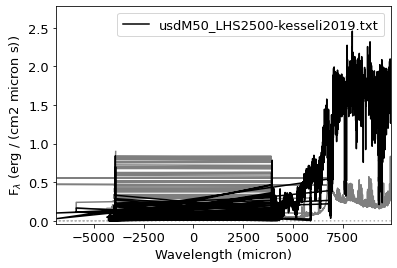

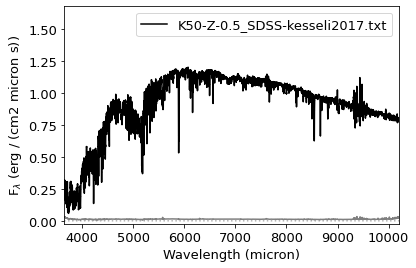

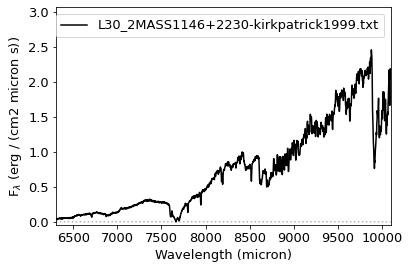

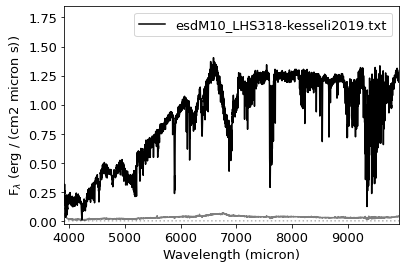

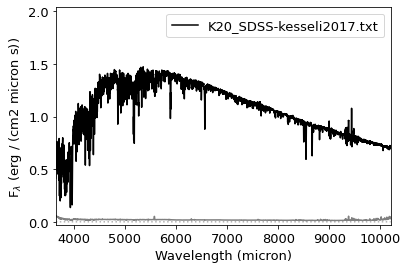

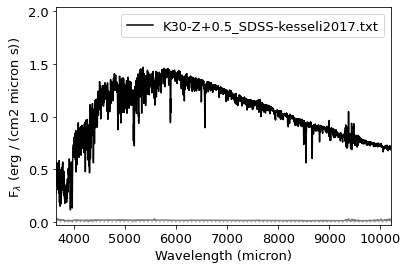

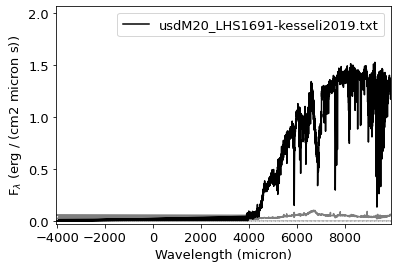

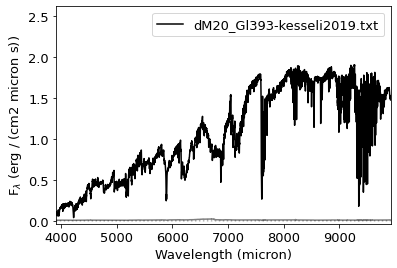

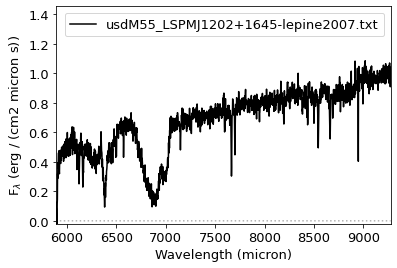

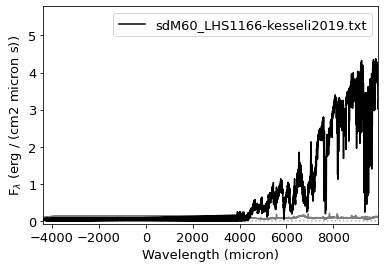

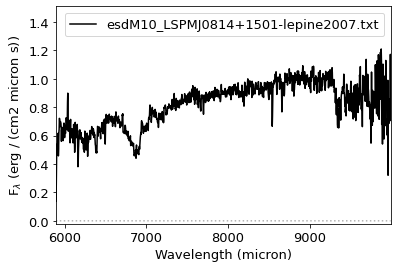

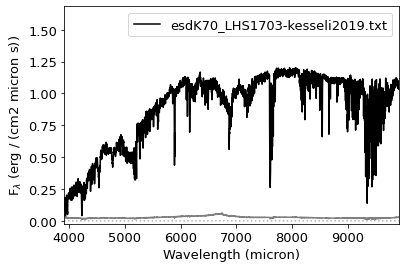

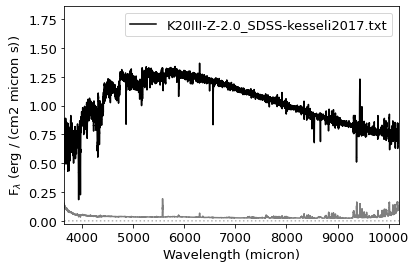

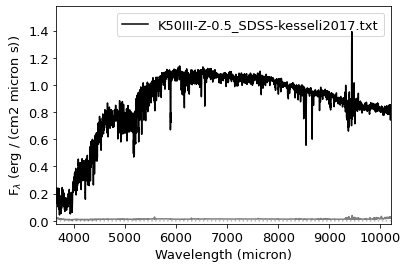

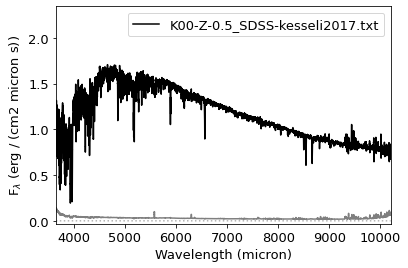

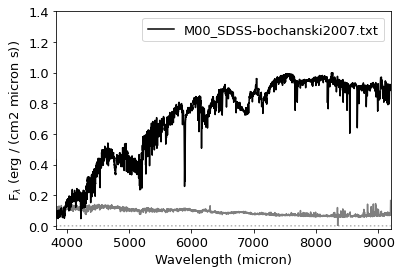

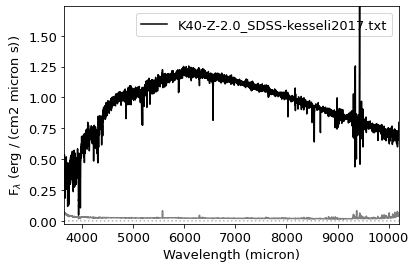

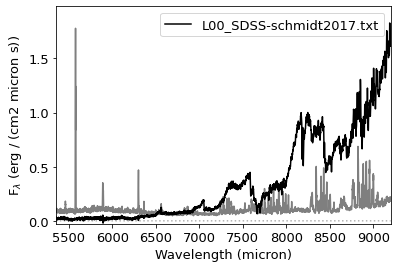

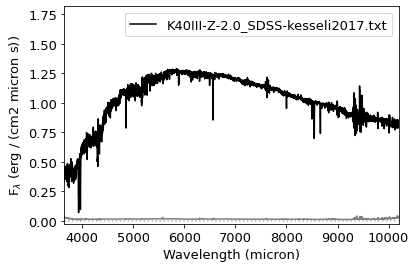

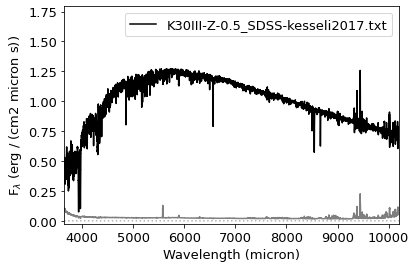

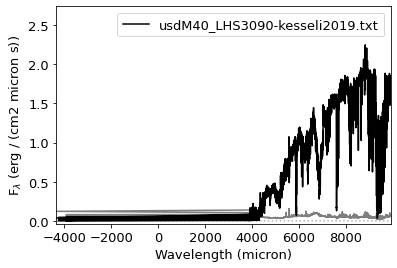

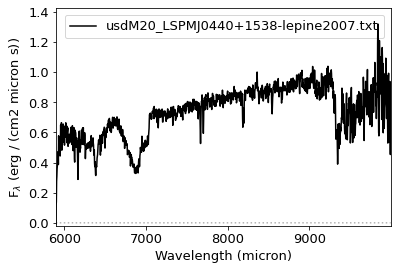

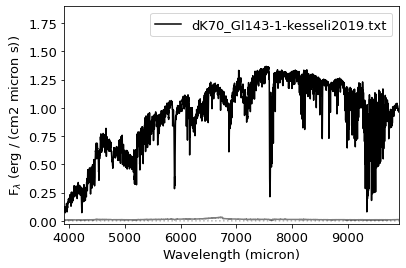

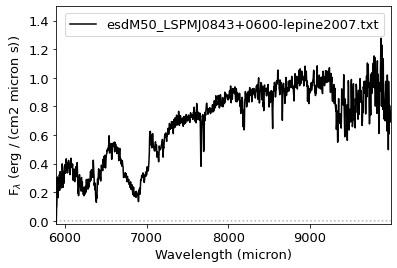

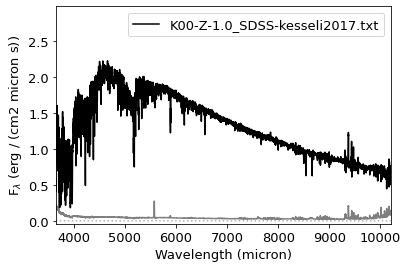

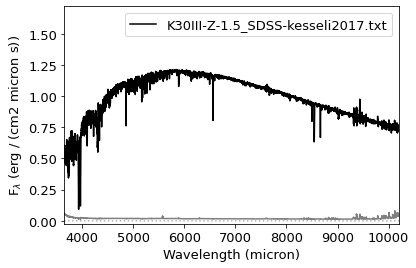

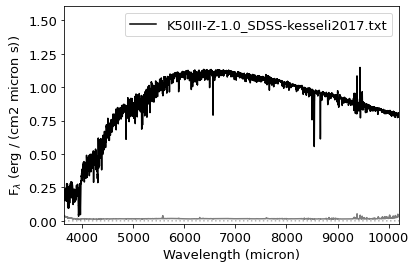

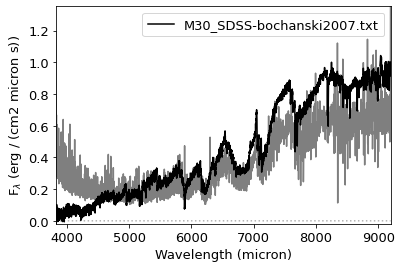

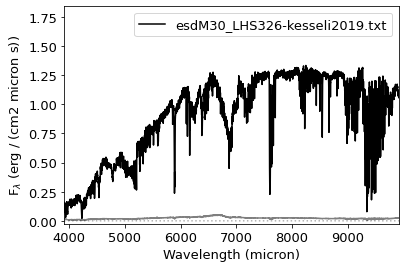

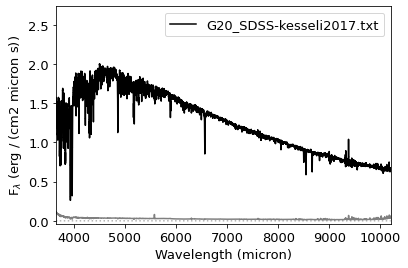

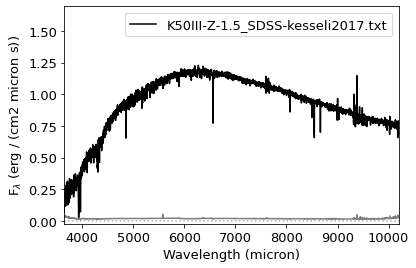

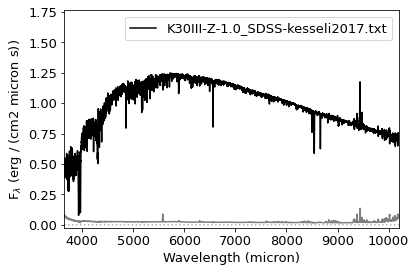

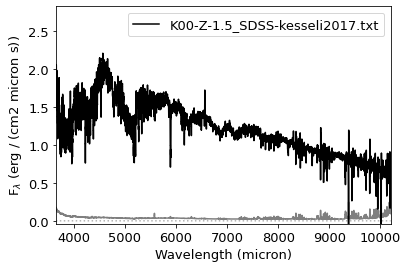

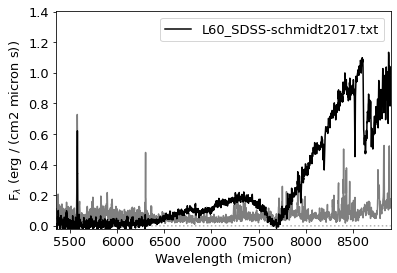

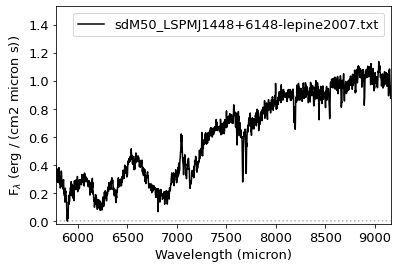

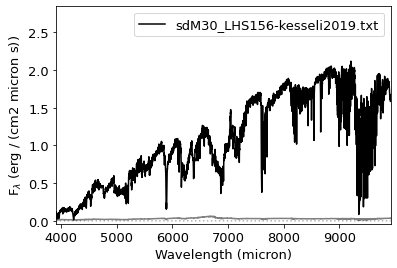

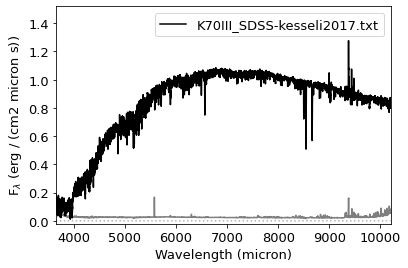

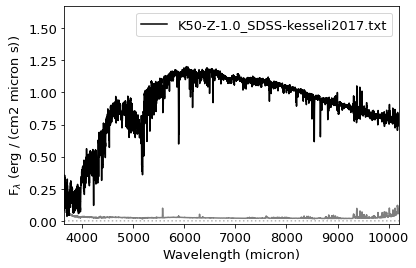

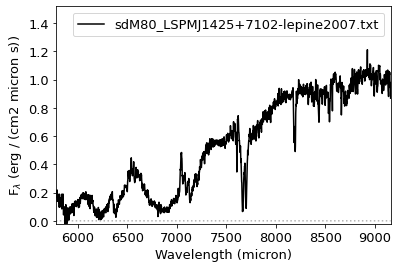

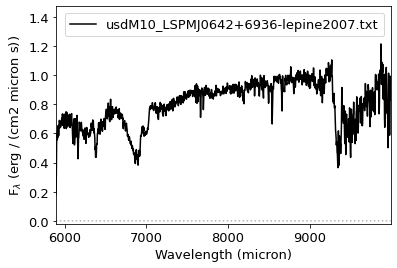

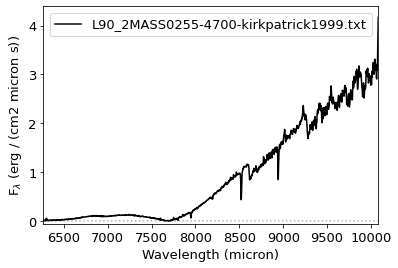

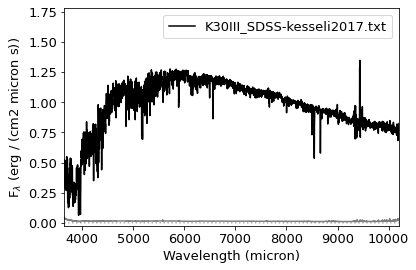

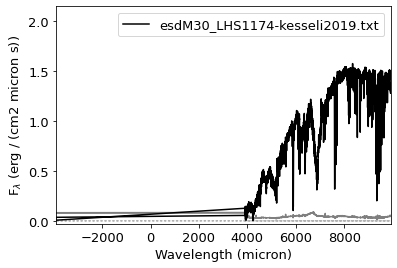

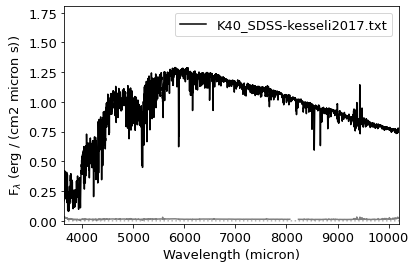

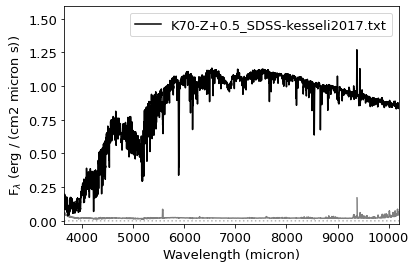

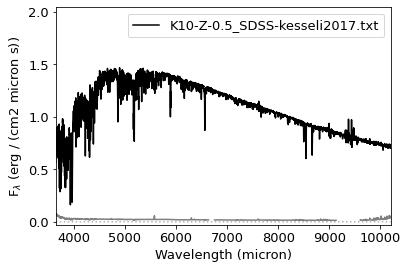

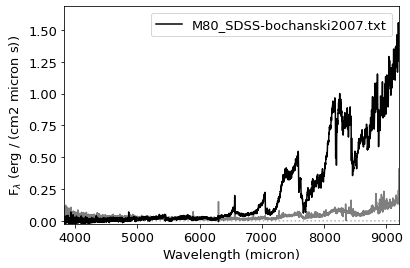

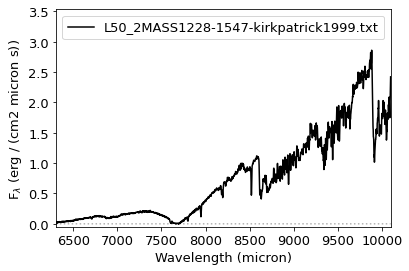

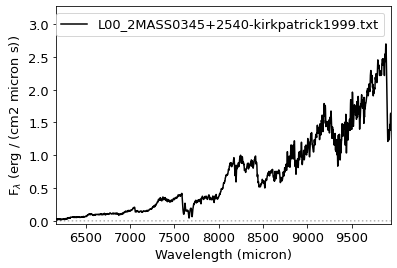

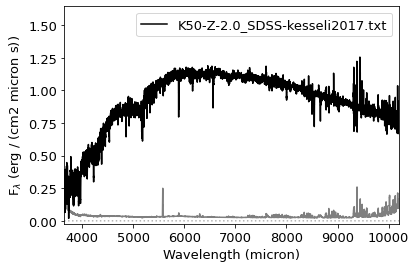

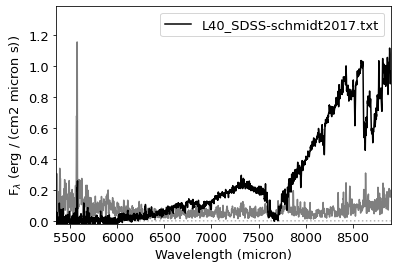

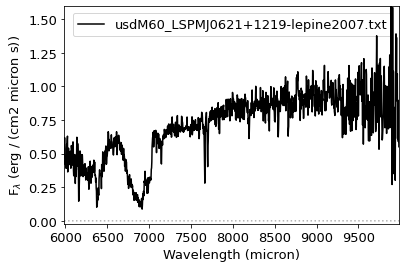

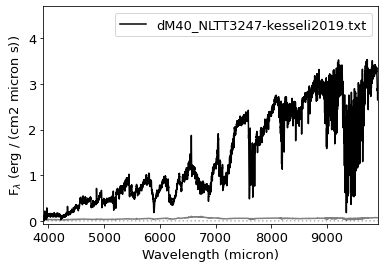

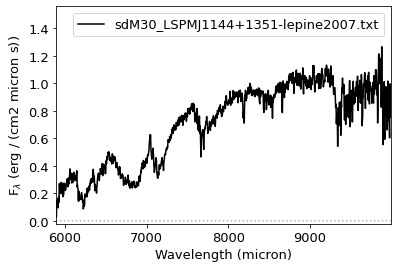

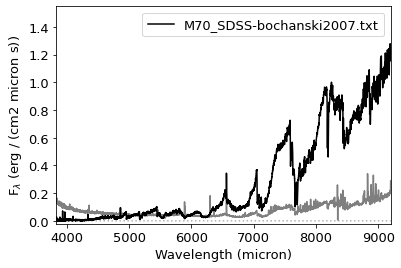

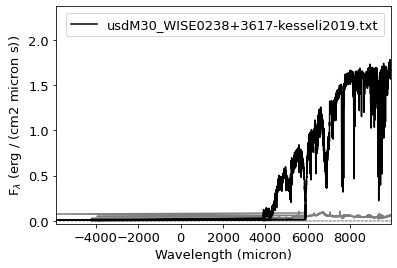

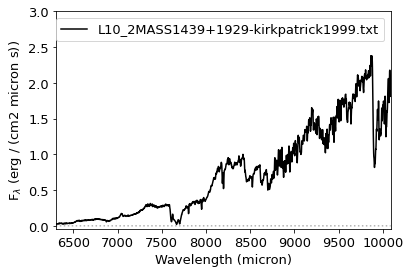

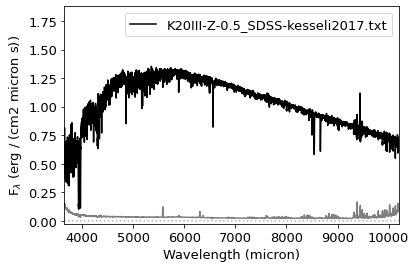

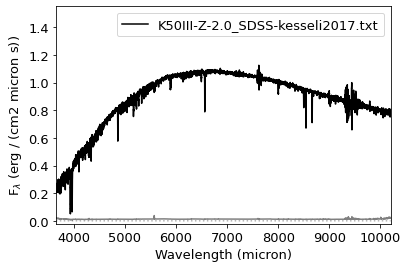

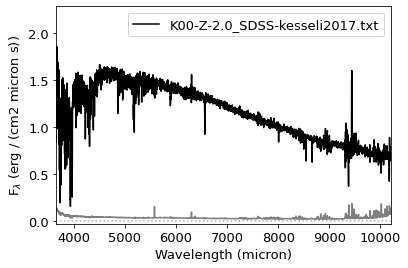

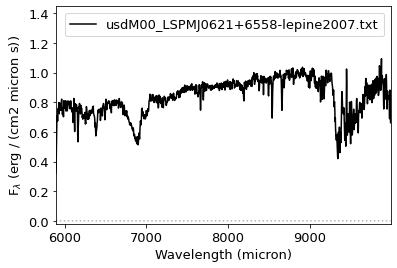

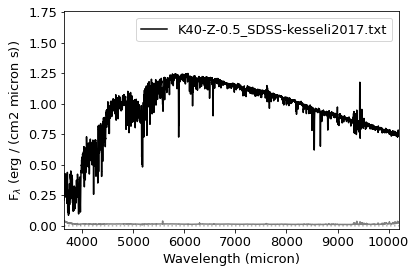

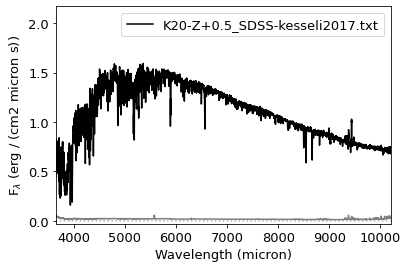

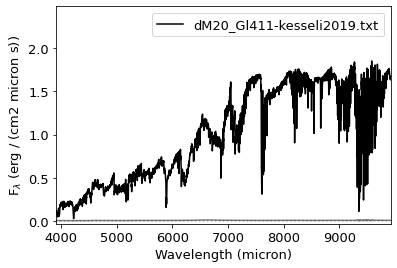

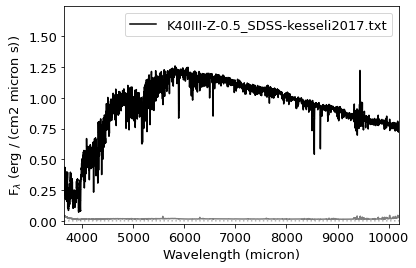

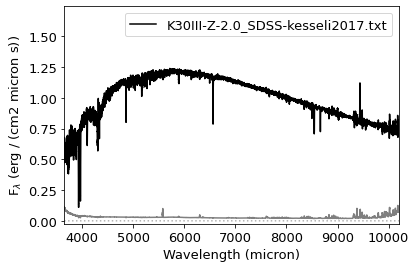

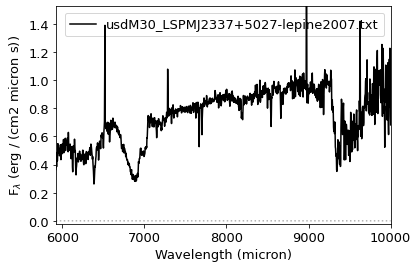

0      [Figure(432x288)]
1      [Figure(432x288)]
2      [Figure(432x288)]
3      [Figure(432x288)]
4      [Figure(432x288)]
             ...        
161    [Figure(432x288)]
162    [Figure(432x288)]
163    [Figure(432x288)]
164    [Figure(432x288)]
165    [Figure(432x288)]
Name: spectra, Length: 164, dtype: object

In [40]:
kast_df.dropna().spectra.apply(lambda x: x.plot())

In [41]:
kast_df.to_pickle(popsims.DATA_FOLDER+'/combined_optical_templates.pkl')

In [43]:
popsims.DATA_FOLDER

'/volumes/LaCie/popsimsdata/popsims/'